In [209]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import sys
import os
import yaml
path = 'images'
images = list(os.listdir(f'{path}'))

In [210]:
vectors = np.ndarray((1020,164))
for image in range(len(images)):
    img = cv.imread(f'{path}/{images[image]}', cv.IMREAD_GRAYSCALE)
    assert img is not None, "file could not be read, check with os.path.exists()"
    img = cv.medianBlur(img,7)
    th = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
                cv.THRESH_BINARY,11,-3)
    titles = ['Original Image', 
                'Adaptive Mean Thresholding + Convolution']
    imgs = [img, th]
    #for i in range(2):
    imgs[1] = imgs[1] @ np.ones(np.transpose(imgs[1]).shape)
        #plt.subplot(2,2,i+1),plt.imshow(imgs[i],'gray')
        #plt.title(titles[i])
        #plt.xticks([]),plt.yticks([])
    #plt.show()
    #matrix = imgs[1].astype(np.bool)
    flag = 0
    vector = []
    for i in range (164):
        if imgs[1][i][82] == 0:
            vector.append(0)
        else:
            vector.append(1)
    vectors[image] = vector

In [211]:
vectors.shape

(1020, 164)

In [212]:
flag = 0
for i in range(1020):
        for j in range (164):
            if vectors[i][j] != False:
                flag+=1
print (flag)

22003


In [213]:
values = vectors.sum(axis = 0)
values.astype(int)

array([152,  23,   1,   0,   0,   0,   2,   2,   0,   0,   0,   0,   0,
         1,   0,   0,   5, 152, 703, 833, 837, 837, 821, 779, 363,  38,
         2,   2,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,
         0,   0,   0,   0,   1,   0,   0,   0,   0,   1,   0,   0,   1,
         0,   0,   0,   9, 332, 792, 844, 850, 842, 830, 695, 197,  19,
         1,   0,   0,   0,   1,   0,   1,   0,   0,   0,   4,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   2,
        65, 514, 802, 817, 822, 805, 776, 486, 110,   6,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   1,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   3,  55,
       494, 778, 805, 808, 806, 800, 749, 418,  80,   3,   0,   0,   0,
         0,   0,   0,   0,   2,   1,   0,   0,   0,   0,   0,   0,   0,
         0,   1,   2,   1,   0,   1,   0,  12])

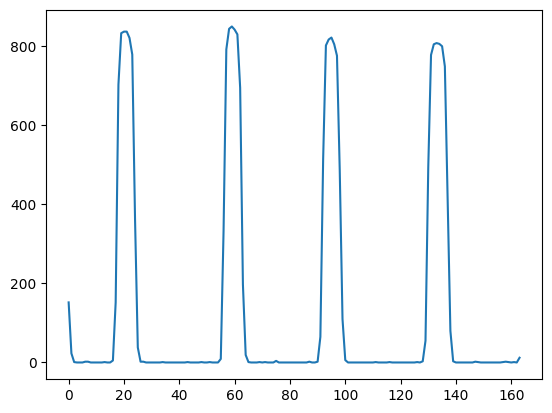

In [214]:
plot1 = plt.plot(np.arange(164),values)

In [ ]:
centres = [21, 61, 94, 134]
final_vectors = np.ndarray((1020,4))
for image in range (len(images)):
    vector = [0,0,0,0]
    for i in range(4):
        flag = 0
        for k in range (-4, 5):
            if values[centres[i]+k] * vectors [image][centres[i]+k] > 800:
                flag = 1
            else:
                continue
        if flag == 0:
            vector[i] = 0
        else:
            vector [i] = 1
    final_vectors[image] = vector

In [217]:
final_vectors

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       ...,
       [1., 1., 1., 1.],
       [0., 1., 0., 1.],
       [1., 1., 1., 0.]])

In [1]:
import pandas as pd
df = pd.DataFrame([images,final_vectors], columns=['Filename', 'Qubit 1 state', 'Qubit 2 state', 'Qubit 3 state', 'Qubit 4 state'])

NameError: name 'images' is not defined